# MLZoomcamp Homework 2

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Loading Dataset

In [2]:
df = pd.read_csv('laptops.csv')

In [3]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


## EDA

### Preparing dataset

In [5]:
df.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

### renaming data columns

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

<Axes: xlabel='final_price', ylabel='Count'>

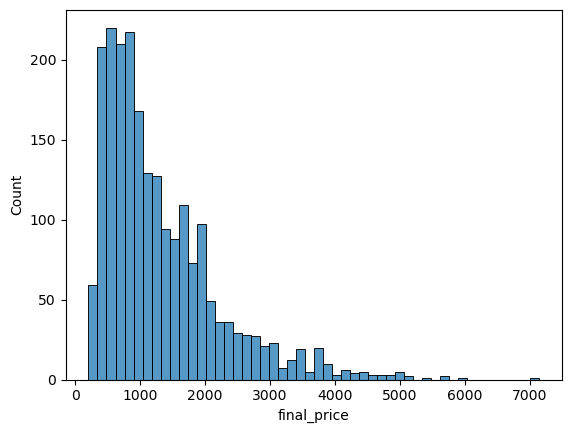

In [7]:
sns.histplot(df['final_price'], bins=50)

In [8]:
selected_columns = [
'ram',
'storage',
'screen',
'final_price'
]

df_fill = df[selected_columns]

In [9]:
df_fill.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


In [10]:
df_fill.isna().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [11]:
df_fill.describe()

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [12]:
df_fill['ram'].median()

16.0

## Splitting Dataset

In [13]:
np.random.seed(42)

In [14]:
n = len(df_fill)
idk = np.arange(n)

In [15]:
idk[:20]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [16]:
np.random.shuffle(idk)

In [17]:
n_test = int(0.2 * n)
n_val = int(0.2 * n)
n_train = n - n_test - n_val

n_test,n_val,n_train,n

(432, 432, 1296, 2160)

In [18]:
df_train = df_fill.iloc[idk[:n_train]]
df_test = df_fill.iloc[idk[n_train:n_train+n_test]]
df_val = df_fill.iloc[idk[n_train+n_test:]]

In [19]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [20]:
df_train.head()

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00


In [21]:
final_price_logs = np.log1p(df['final_price'])

<Axes: xlabel='final_price', ylabel='Count'>

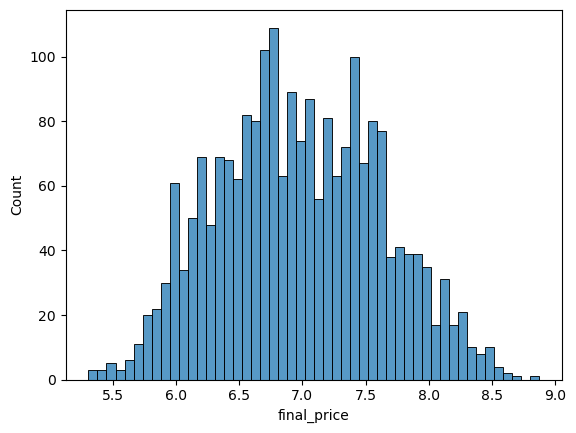

In [22]:
sns.histplot(final_price_logs, bins=50)

## The Model

#### Using Normal Equation Method

In [23]:
base = [
'ram',
'storage',
'screen']

In [24]:
def prepare_o (df):
    # y = np.log1p(df['final_price'].values)
    y = df['final_price'].values
    df = df[base]
    df = df.fillna(0).values
    return df, y

In [25]:
def prepare_m (df):
    # y = np.log1p(df['final_price'].values
    y = df['final_price'].values
    df = df[base]
    df = df.fillna(df.mean()).values
    return df, y

In [26]:
def train_linreg(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [27]:
def rmse(y, y_pred):
    se = (y - y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [28]:
trainX_0, yX_0 = prepare_o(df_train)
w0, w = train_linreg(trainX_0, yX_0)

yPredX0 = w0 + trainX_0.dot(w)
score = rmse(yX_0, yPredX0)
score = round(score, 2)
score

602.39

In [29]:
trainX_m, yX_m = prepare_m(df_train)
w0, w = train_linreg(trainX_m, yX_m)

yPredXm = w0 + trainX_m.dot(w)
score = rmse(yX_m, yPredXm)
score = round(score, 2)
score

602.18

In [30]:
X_val0, yval_0 = prepare_o(df_val)

ypred0 = w0 + X_val0.dot(w)
score = rmse(yval_0, ypred0)
score = round(score, 2)
score

547.32

In [31]:
X_valm,yval_m = prepare_m(df_val)
ypredm = w0 + X_valm.dot(w)
score = rmse(yval_m, ypredm)
score = round(score, 2)
score

547.32

## Regularization

In [32]:
def train_lin_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [33]:
regs = [0, 0.01, 0.1, 1, 5, 10, 100]
scored = {}


for r in regs:
    trainX, yX = prepare_o(df_train)
    w0, w = train_lin_reg(trainX, yX, r=r)
    
    X_valm,yval_m = prepare_m(df_val)
    ypredm = w0 + X_valm.dot(w)
    score = rmse(yval_m, ypredm)
    score = round(score, 2)
    scored[r] = score
    print(score)
    
print(scored)

547.04
547.04
547.04
547.0
547.06
547.25
548.32
{0: 547.04, 0.01: 547.04, 0.1: 547.04, 1: 547.0, 5: 547.06, 10: 547.25, 100: 548.32}


### Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

In [34]:
rmselist = []
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for seed in seeds:
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)
    df_train = df_fill.iloc[idx[:n_train]]
    df_test = df_fill.iloc[idx[n_train:n_train+n_test]]
    df_val = df_fill.iloc[idx[n_train+n_test:]]
    
    df_train = df_train.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    
    trainX_0, yX_0 = prepare_o(df_train)
    w0, w = train_linreg(trainX_0, yX_0)
    
    X_val0,yval_0 = prepare_o(df_val)
    ypred0 = w0 + X_val0.dot(w)
    score = rmse(yval_0, ypred0)
    rmselist.append(score)
print(rmselist)
std = np.std(rmselist)
std = round(std, 3)
std

[578.24396344316, 570.1688046923916, 594.9409692010372, 626.1701913231832, 611.5274831595048, 573.7007929380331, 543.5149768642533, 631.0181963603811, 672.9906309991741, 614.1110846523201]


35.427

In [35]:
#rmse on test dataset
np.random.seed(9)
np.random.shuffle(idk)
df_train = df_fill.iloc[idk[:n_train]]
df_test = df_fill.iloc[idk[n_train:n_train+n_test]]
df_val = df_fill.iloc[idk[n_train+n_test:]]
    
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

merged_df = pd.concat([df_train, df_val], axis=0)

trainX_m, yX_m = prepare_o(merged_df)

w0, w = train_lin_reg(trainX_m, yX_m, r=0.001)
    
X_test0,ytest_0 = prepare_o(df_test)
ypred0 = w0 + X_test0.dot(w)
score = rmse(ytest_0, ypred0)

score

548.9199913248564